# Evaluate BGP catchment in Tangled testbed
# Analysing prepends on playbook

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
plt.style.use('default') #https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
from IPython.core.display import display, HTML
%matplotlib inline

<ipython-input-1-35d2c5b01a6b>:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
df_all = pd.DataFrame()
df_raw = pd.DataFrame()
for file in (glob.glob('*.txt')):

    bgp = file.split(".")[0].split("-")[0]
    df = pd.read_csv(file,names=['data'],skiprows=1)  
    df = df.data.str.split("█",expand=True)[0].str.split("[|\-]",expand=True)
    df_raw['site'] = df.iloc[:,0].str.upper() + "-" +  df.iloc[:,1].str.upper()
    df_raw['count'] = df.iloc[:,3].astype(int)
    df_raw['percent'] = df_raw['count']/df_raw['count'].sum()*100
    df_raw['bgp'] = bgp
    df_all = pd.concat([df_raw, df_all],sort=False)

In [3]:
df_all.groupby('bgp').size()

bgp
1xCDG       4
1xLHR       4
1xMIA       4
1xSYD       4
2xCDG       4
2xLHR       4
2xMIA       4
2xSYD       4
3xCDG       4
3xLHR       4
3xMIA       4
3xSYD       4
baseline    4
dtype: int64

In [4]:
df_all.head()

,site,count,percent,bgp
0,UK-LND,1702576,47.495369,3xCDG
1,US-MIA,1129067,31.496658,3xCDG
2,AU-SYD,717995,20.029319,3xCDG
3,FR-PAR,35082,0.978654,3xCDG
0,UK-LND,1902875,53.578523,3xMIA


In [5]:
data = df_all.groupby(['site','bgp'])['percent'].sum().unstack().T.fillna(0)
data= data.reindex(['3xMIA','2xMIA','1xMIA','3xLHR','2xLHR','1xLHR','3xCDG','2xCDG',
                    '1xCDG','3xSYD','2xSYD','1xSYD','baseline'])
# data.groupby('bgp').size()

# General Overview

<ipython-input-6-b6cb7e9c2c64>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=0);


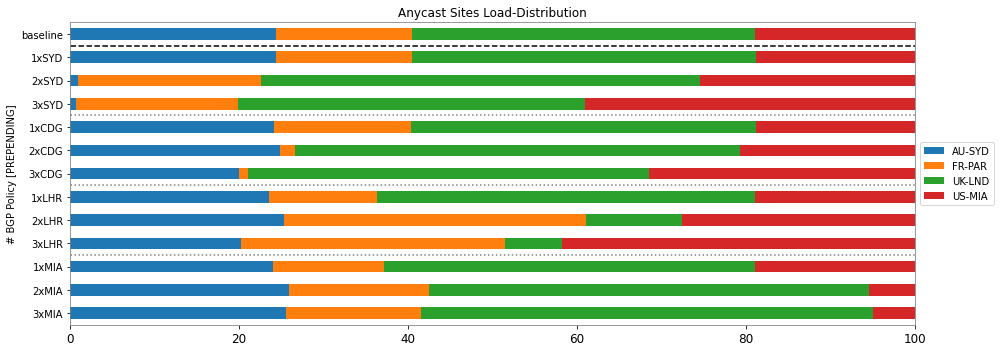

In [6]:
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot2grid((1,1), (0,0))
data.plot(ax=ax,
        kind='barh', 
        stacked=True
         );
ax.xaxis.label.set_color('black')
ax.set_ylabel('# BGP Policy [PREPENDING]');
ax.tick_params(colors='black')
ax.xaxis.set_tick_params(labelsize=12)
ax.set_title('Anycast Sites Load-Distribution')
plt.gca().legend().set_title('')
ax.set_facecolor("#ffffff")

ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ax.set_xlim(xmax=100) 

# plot dashed line on the top
ax.axhline(y=11.5, xmin=-1, xmax=1.0, color='black',linestyle='--')
ax.axhline(y=8.5, xmin=-1, xmax=1.0, color='grey',linestyle='dotted')
ax.axhline(y=5.5, xmin=-1, xmax=1.0, color='grey',linestyle='dotted')
ax.axhline(y=2.5, xmin=-1, xmax=1.0, color='grey',linestyle='dotted')

fig.tight_layout();
xlabels = ax.get_xticklabels()

ax.set_xticklabels(xlabels, rotation=0);
plt.show()
title = "<h2 style=\"color:#000\">Evaluating changes in: {} </h2>".format(bgp.upper())
display(HTML("take-away: Prepending does impact in the load distribution"))



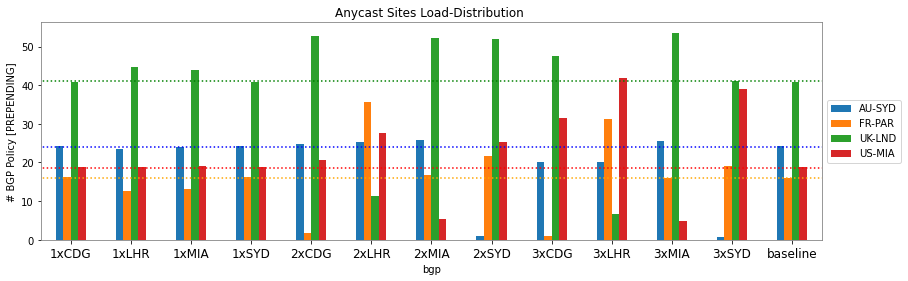

In [7]:
data = df_all.groupby(['site', 'bgp'])['percent'].sum().unstack().T

fig = plt.figure(figsize=(14, 4))
ax = plt.subplot2grid((1,1), (0,0))
data.plot(ax=ax,
    kind='bar', 
    stacked=False
     );
ax.xaxis.label.set_color('black')
ax.set_ylabel('# BGP Policy [PREPENDING]');
ax.tick_params(colors='black')
ax.xaxis.set_tick_params(labelsize=12)
title = 'Anycast Sites Load-Distribution '
ax.set_title(title)
plt.gca().legend().set_title('')
ax.set_facecolor("#ffffff")
xlabels = data.index.get_level_values(0).tolist()
ax.set_xticklabels(xlabels, rotation=0);
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.axhline(y=18.5, xmin=-1, xmax=1.0, color='red',linestyle='dotted')
ax.axhline(y=41.0, xmin=-1, xmax=1.0, color='green',linestyle='dotted')
ax.axhline(y=16.0, xmin=-1, xmax=1.0, color='orange',linestyle='dotted')
ax.axhline(y=24.0, xmin=-1, xmax=1.0, color='blue',linestyle='dotted')


plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
# ax.set_xlim(xmax=100) 

# Sites Overview

In [8]:
def plot_site(df,site):
#     print (data.head())
    data = df.groupby(['site','bgp'])['percent'].sum().unstack().T.fillna(0)
    data.sort_index(inplace=True,ascending=False)

    fig = plt.figure(figsize=(10, 4))
    ax = plt.subplot2grid((1,1), (0,0))
    data.plot(ax=ax,
        kind='barh', 
        stacked=True
         );
    ax.xaxis.label.set_color('black')
    ax.set_ylabel('# BGP Policy [PREPENDING]');
    ax.tick_params(colors='black')
    ax.xaxis.set_tick_params(labelsize=12)
    title = 'Anycast Sites Load-Distribution - Site {}'.format(site)
    ax.set_title(title)
    plt.gca().legend().set_title('')
    ax.set_facecolor("#ffffff")

    ax.spines['bottom'].set_color('0.5')
    ax.spines['top'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
    ax.set_xlim(xmax=100) 

{'LHR', 'MIA', 'SYD', 'CDG'}
LHR


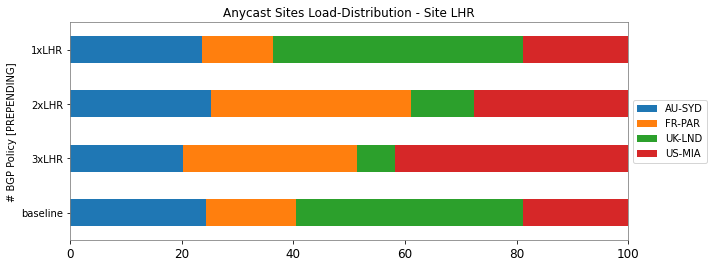

MIA


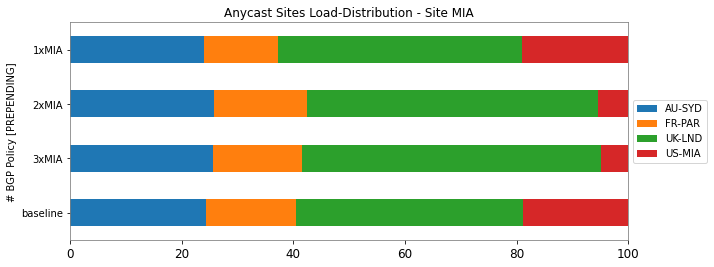

SYD


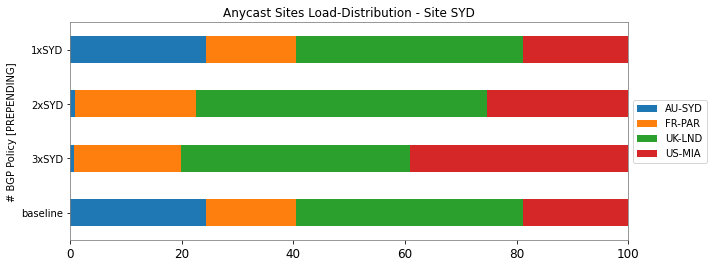

CDG


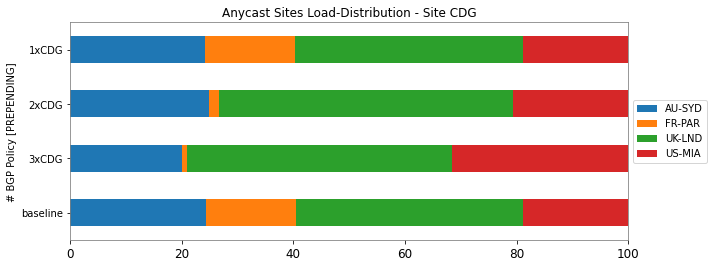

In [9]:
sites = []
for bgp in df_all['bgp'].unique():
    if (bgp=="baseline"):
        continue
    policy_site = bgp.split("x")[1]
    sites.append(policy_site)
print (set(sites))
sites=set(sites)
for bgp in sites:
    print (bgp)
    title = "<h2 style=\"color:#069\" >Evaluating changes in: {} </h2>".format(bgp.upper())
    display(HTML(title))
    data = df_all[df_all['bgp'].str.contains(bgp)]
    data = data.sort_values(by="bgp")
    data = data.append(df_all[df_all['bgp'].str.contains("baseline")])
    plot_site(data,bgp)
    plt.show()

In [10]:
def plot_site_bar(data, label,figure_name):

    fig = plt.figure(figsize=(10, 4))
    ax = plt.subplot2grid((1,1), (0,0))

    ax.xaxis.label.set_color('black')
    ax.set_ylabel('# Percent');
    ax.tick_params(colors='black')
    ax.xaxis.set_tick_params(labelsize=12)

    data= data.reindex(['UK-LND','AU-SYD', 'US-MIA', 'FR-PAR'])

    data['percent'].plot(ax=ax,
        kind='bar')
    ax.set_ylim(ymax=100);
    
    title = ' BGP Policy: {}'.format(label.upper())
    ax.set_title(title)
    xlabels = data.index.get_level_values(0).tolist()
    ax.set_xticklabels(xlabels, rotation=0);
    fig.savefig("./imgs/"+figure_name+".png", bbox_inches='tight', dpi=1200)

#     ax.annotate(label.upper(),
#             xy=(0, 0), xycoords='data',
#             xytext=(155, 160), textcoords='offset points',
#             size=18, 
#             )
    
    ax.set_facecolor("#ffffff")
    

# bar chart for each site

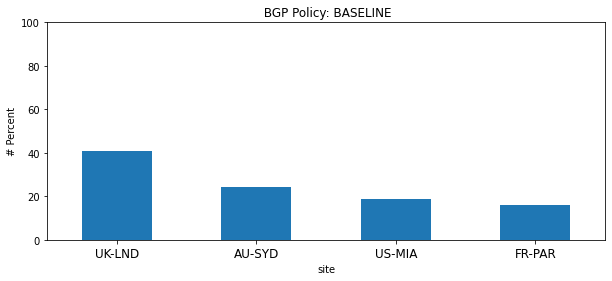

info for 1xLHR
          count    percent    bgp
site                             
UK-LND  1604625  44.826560  1xLHR
AU-SYD   843519  23.564419  1xLHR
US-MIA   676093  18.887231  1xLHR
FR-PAR   455393  12.721790  1xLHR


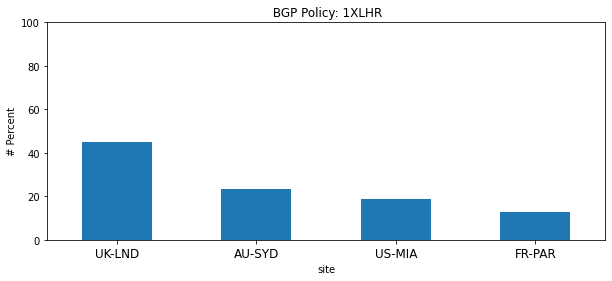

info for 2xLHR
          count    percent    bgp
site                             
FR-PAR  1302124  35.763137  2xLHR
US-MIA  1004826  27.597778  2xLHR
AU-SYD   921743  25.315884  2xLHR
UK-LND   412274  11.323201  2xLHR


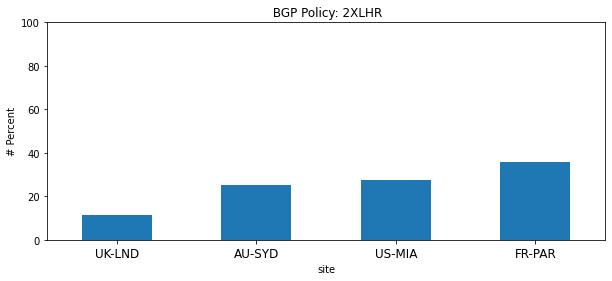

info for 3xLHR
          count    percent    bgp
site                             
US-MIA  1499828  41.805141  3xLHR
FR-PAR  1121808  31.268480  3xLHR
AU-SYD   723945  20.178729  3xLHR
UK-LND   242083   6.747650  3xLHR


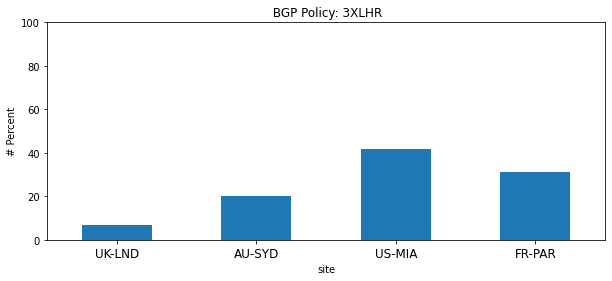

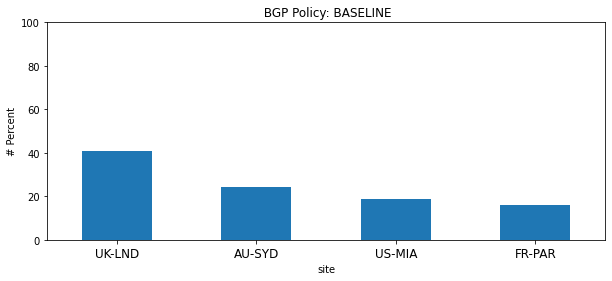

info for 1xMIA
          count    percent    bgp
site                             
UK-LND  1577328  43.861562  1xMIA
AU-SYD   864676  24.044485  1xMIA
US-MIA   682113  18.967863  1xMIA
FR-PAR   472034  13.126090  1xMIA


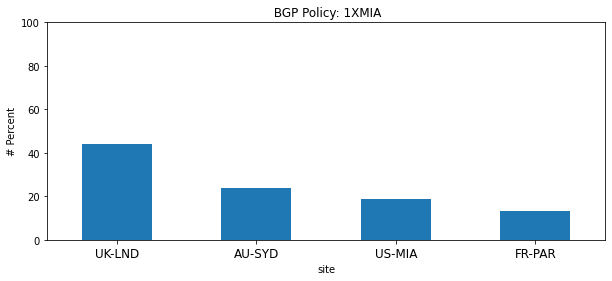

info for 2xMIA
          count    percent    bgp
site                             
UK-LND  1855197  52.107518  2xMIA
AU-SYD   920692  25.859774  2xMIA
FR-PAR   592310  16.636403  2xMIA
US-MIA   192126   5.396305  2xMIA


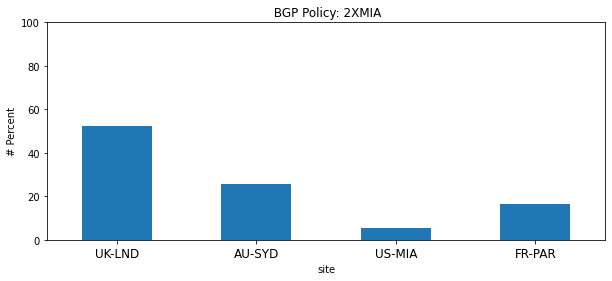

info for 3xMIA
          count    percent    bgp
site                             
UK-LND  1902875  53.578523  3xMIA
AU-SYD   907618  25.555453  3xMIA
FR-PAR   567008  15.965027  3xMIA
US-MIA   174062   4.900997  3xMIA


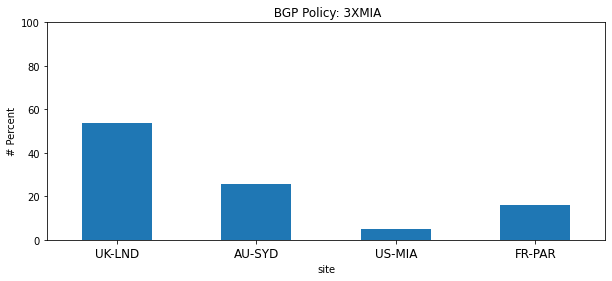

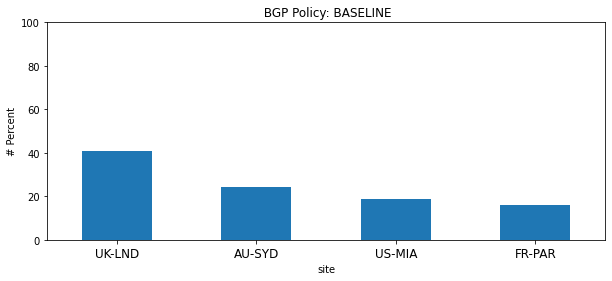

info for 1xSYD
          count    percent    bgp
site                             
UK-LND  1472031  40.724950  1xSYD
AU-SYD   879300  24.326559  1xSYD
US-MIA   679284  18.792951  1xSYD
FR-PAR   583953  16.155541  1xSYD


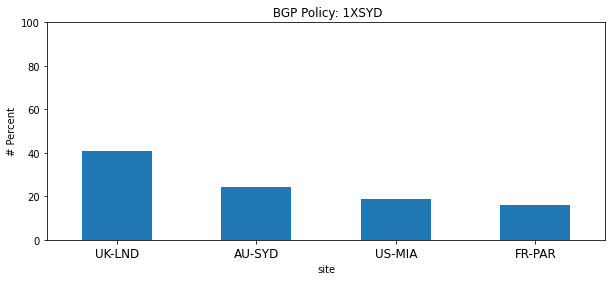

info for 2xSYD
          count    percent    bgp
site                             
UK-LND  1889934  52.075645  2xSYD
US-MIA   920745  25.370404  2xSYD
FR-PAR   786342  21.667035  2xSYD
AU-SYD    32188   0.886915  2xSYD


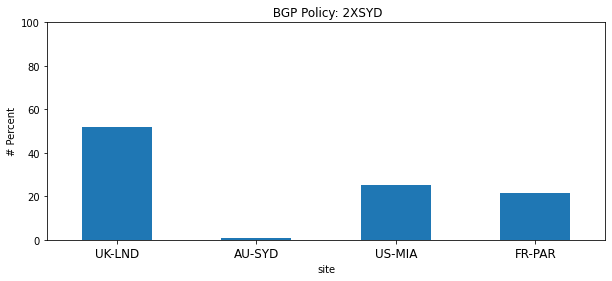

info for 3xSYD
          count    percent    bgp
site                             
UK-LND  1490482  41.044111  3xSYD
US-MIA  1419508  39.089666  3xSYD
FR-PAR   695831  19.161429  3xSYD
AU-SYD    25594   0.704794  3xSYD


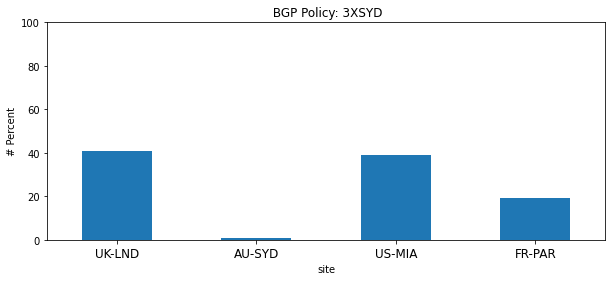

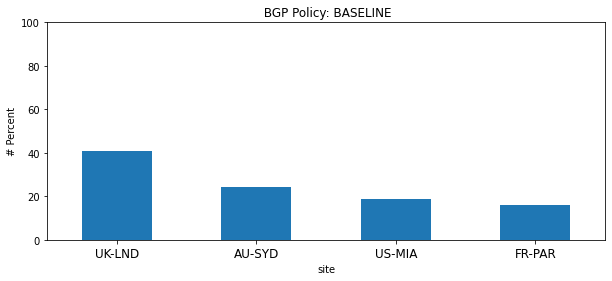

info for 1xCDG
          count    percent    bgp
site                             
UK-LND  1476660  40.885444  1xCDG
AU-SYD   872266  24.151113  1xCDG
US-MIA   678674  18.790980  1xCDG
FR-PAR   584101  16.172463  1xCDG


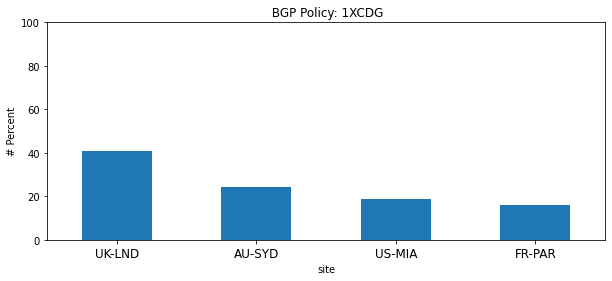

info for 2xCDG
          count    percent    bgp
site                             
UK-LND  1898772  52.705046  2xCDG
AU-SYD   896177  24.875577  2xCDG
US-MIA   745756  20.700276  2xCDG
FR-PAR    61933   1.719101  2xCDG


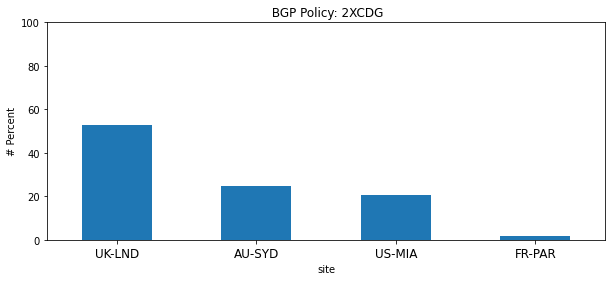

info for 3xCDG
          count    percent    bgp
site                             
UK-LND  1702576  47.495369  3xCDG
US-MIA  1129067  31.496658  3xCDG
AU-SYD   717995  20.029319  3xCDG
FR-PAR    35082   0.978654  3xCDG


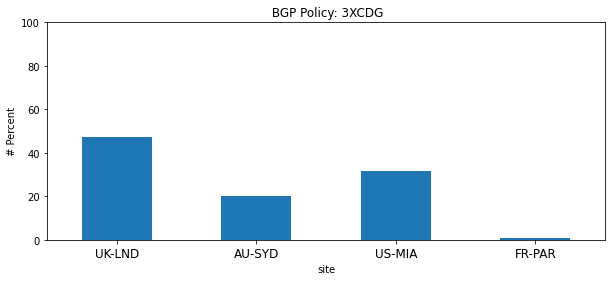

In [11]:
for site in sites:
#     print (site)
    
    title = "<h2 style=\"color:#069\" >Evaluating changes in: {} </h2>".format(site.upper())
    display(HTML(title))
    # plot baseline
    data = df_all[df_all['bgp'].str.contains("baseline")].set_index('site')
    label = data.loc[:,"bgp"][1]
    plot_site_bar(data,label,label+site)
    plt.show()
    
    for  policy in sorted(df_all[df_all['bgp'].str.contains(site)]['bgp'].unique().tolist()):

         print ("info for {}".format(policy))
        
         data = df_all[df_all['bgp'].str.contains(policy)].set_index('site').drop_duplicates()
         print (data.head())
         label = data.loc[:,"bgp"][1]
         plot_site_bar(data,label,policy)
                
         plt.show()
    display(HTML("<hr>"))


In [12]:
!cd imgs;convert -delay 15 -loop 0 baselineMIA.png 1xMIA.png 2xMIA.png 3xMIA.png MIA.gif; cd -

zsh:1: command not found: convert


![SegmentLocal](imgs/MIA.gif"segment")

In [13]:
data = df_all.groupby(['site','bgp'])['percent'].sum().reset_index()



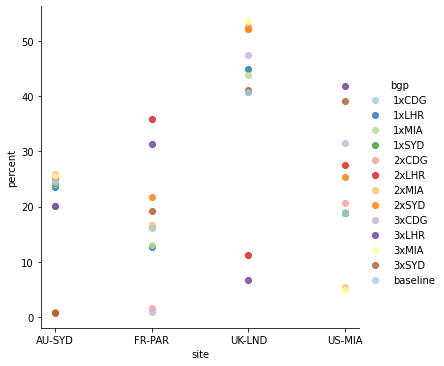

In [14]:
import seaborn as sns
palette = sns.color_palette("mako_r", 6)
sns.lmplot( x="site", y="percent", data=data, fit_reg=False, palette="Paired",hue='bgp', legend=True)
# sns.lineplot( x="site", y="percent", data=data, fit_reg=False, hue='bgp', legend=True)

# df_all.groupby(['site','bgp'])['percent'].sum().plot(kind="bar",stacked=True)

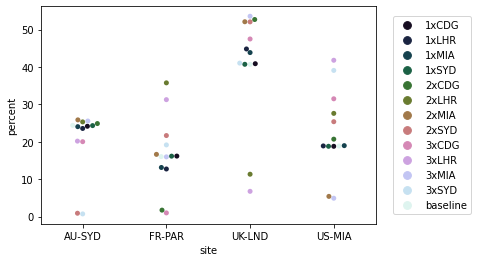

In [15]:
g = sns.swarmplot(x='site', y='percent', data=data, palette="cubehelix",
              hue='bgp')
g.legend(loc='center right', bbox_to_anchor=(1.30, 0.5), ncol=1)


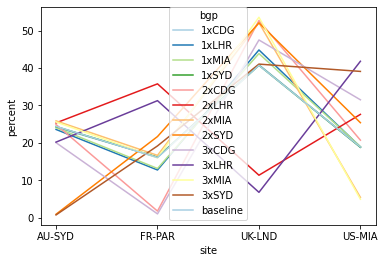

In [16]:
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(x="site", y="percent", data=data, estimator=None, palette="Paired", hue="bgp")

In [17]:
# data1 = pd.crosstab(data.site, data.bgp)


# data1.head()
# data = data.drop(['total'],axis=1)
# ax.set_xlabel('# YYYY-MM-DD');

# ax = sns.heatmap(data,cmap="Blues",annot=True)

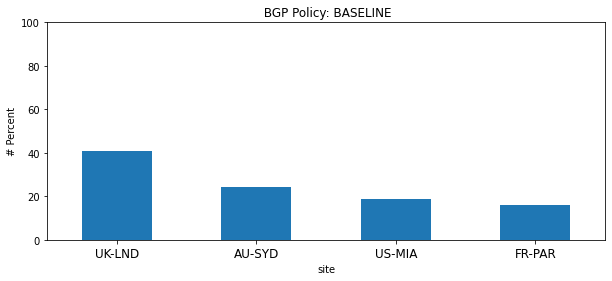

In [29]:
data = df_all[df_all['bgp'].str.contains("baseline")].set_index('site')
label = data.loc[:,"bgp"][1]

plot_site_bar(data,label,label+site)

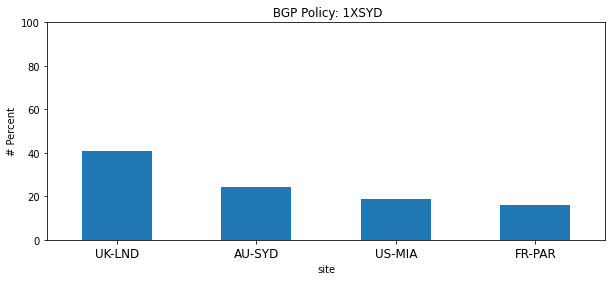

In [30]:
data = df_all[df_all['bgp'].str.contains("1xSYD")].set_index('site')
label = data.loc[:,"bgp"][1]
plot_site_bar(data,label,label+site)

 

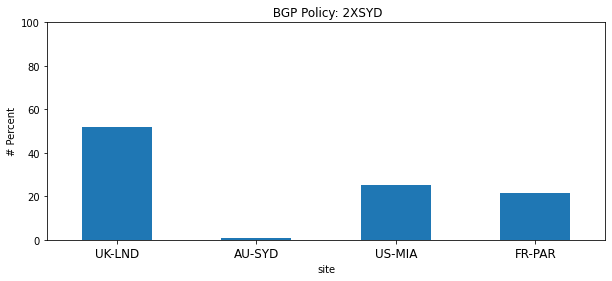

In [31]:
data = df_all[df_all['bgp'].str.contains("2xSYD")].set_index('site')
label = data.loc[:,"bgp"][1]
plot_site_bar(data,label,label+site)

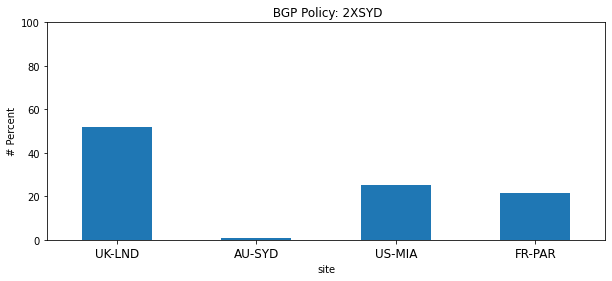

In [32]:
data = df_all[df_all['bgp'].str.contains("2xSYD")].set_index('site')
plot_site_bar(data,label,label+site)